# Plotting the data with Plotly

## Outline

### 1. Importing the data
### 2. ARIMA
### 3. Plotly Scatter Plots
### 4. Plotly Maps

In [1]:
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib
import plotly.express as px
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

### 1. Importing the data
Importing the necessary py file to read the json files.

In [23]:
# %load json_to_csv.py
import geopandas as gp
import pandas as pd
import datetime as dt
import numpy as np


def import_geojson(geojson):
    '''imports geojson to notebook and reads with geopandas'''
    '''input must be in 'NASA/<file.json>' format, or other path name'''
    filename = geojson
    if filename.endswith('.json'):
        data = gp.read_file(filename)
    else:
        raise TypeError('file extension is not .json.')
    return(data)


def convert_data(data):
    '''converts parameter column to dict then df reads with Pandas'''
    data_dict = data['parameter'][0]
    pd_df = pd.DataFrame.from_dict(data_dict)
    df = pd.DataFrame(pd_df)
    return(df)


def remove_annual(df):
    '''remove the annual average rows (13th month) from df'''
    monthly = df[~df.index.str.endswith('13', na=False)]
    if len(monthly) > 444:
        raise ValueError('Check length of dataset.')
    elif len(monthly) < 444:
        raise ValueError('Check index. Length of dataset is short.')
    else:
        pass
    return(monthly)


def to_datetime(monthly):
    '''convert index from yearmonth string to datetime'''
    def append(dfseries):
        dfseries = dfseries[:4] + '-' + dfseries[4:]
        return dfseries

    monthly.index = monthly.index.rename('ds')
    dated = monthly.reset_index()
    dated['ds'] = dated['ds'].apply(append)
    dated = dated.set_index('ds')
    dated.index = pd.to_datetime(dated.index)
    return(dated)


def geojson_to_csv(geojson):
    '''convert geojson to csv'''
    '''input must be in 'NASA/<file.json>' format, or other path name'''
    data = import_geojson(geojson)
    df1 = convert_data(data)
    monthly = remove_annual(df1)
    df = to_datetime(monthly)
    if not isinstance(df.index, pd.core.indexes.datetimes.DatetimeIndex):
        raise TypeError('index type must be DatetimeIndex')
    else:
        pass
    return(df)


#### Reading the data from Spokane, WA
Spokane coordinates: 47.6748 N, 117.3698 W

In [3]:
spokane = geojson_to_csv('NASA/POWER_Point_Monthly_Timeseries_1981_2020_047d6748N_117d3698W_LST.json')
spokane

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
ds,,,,,,,,,,,,,,
1984-01-01,0.49,70.70,0.71,2.96,-999.00,-999.00,0.28,-999.00,1.47,2.10,-999.00,-999.00,-999.00,-999
1984-02-01,0.51,68.62,0.72,4.52,-999.00,-999.00,0.29,-999.00,2.28,3.26,-999.00,-999.00,-999.00,-999
1984-03-01,0.52,72.22,0.76,6.77,-999.00,-999.00,0.28,-999.00,3.52,5.12,-999.00,-999.00,-999.00,-999
1984-04-01,0.53,75.34,0.77,9.07,-999.00,-999.00,0.19,-999.00,4.78,6.99,-999.00,-999.00,-999.00,-999
1984-05-01,0.51,78.25,0.77,10.79,-999.00,-999.00,0.17,-999.00,5.48,8.24,-999.00,-999.00,-999.00,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.66,39.41,0.74,9.60,15.23,0.34,0.13,7.80,6.34,7.10,117.22,1.77,130.59,-999
2020-09-01,0.56,45.03,0.65,7.46,9.27,0.19,0.13,5.44,4.17,4.82,75.07,1.41,86.34,-999
2020-10-01,0.52,57.19,0.70,5.16,6.04,0.10,0.16,4.03,2.71,3.60,48.59,1.09,65.12,-999


Here we're going to look at the data fromr the `ALLSKY_KT` column, where `ALLSKY_KT` is the All Sky Insolation Clearness Index; the all sky insolation that is transmitted through the atmosphere to strike the surface of the earth divided by the average of top of the atmosphere total solar irradiance incident (dimensionless). We're also going to rename the column to `Solar Ratio`.

In [4]:
spokane = spokane.rename(columns = {"ALLSKY_KT": "Solar Ratio"})
spokane['Solar Ratio']

ds
1984-01-01    0.49
1984-02-01    0.51
1984-03-01    0.52
1984-04-01    0.53
1984-05-01    0.51
              ... 
2020-08-01    0.66
2020-09-01    0.56
2020-10-01    0.52
2020-11-01    0.38
2020-12-01    0.37
Name: Solar Ratio, Length: 444, dtype: float64

## 2. ARIMA
Again, we are only doing a single variable model to start with using the `Solar Ratio` data from Spokane, WA.

In [5]:
model = ARIMA(spokane['Solar Ratio'].values, order=(1,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()

pred_sol = model_fit.predict(start = 0, end = 600)

Plot the results.

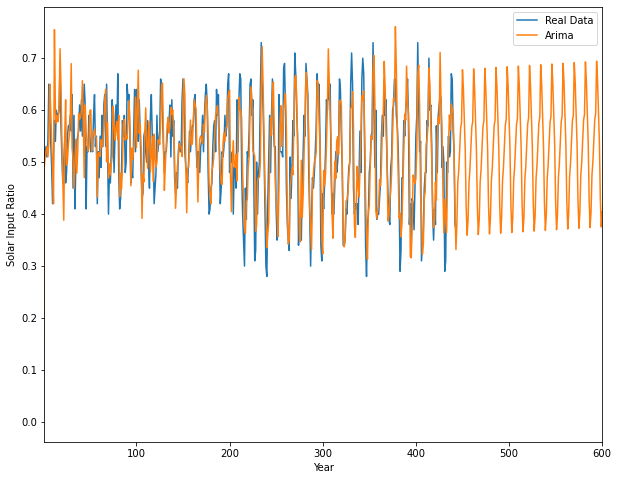

In [6]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(spokane['Solar Ratio'].values,label = 'Real Data')
ax.plot(pred_sol, label = 'Arima')
ax.set_xlim(1,600)
ax.set_xlabel('Year')
ax.set_ylabel('Solar Input Ratio')
ax.legend()
plt.show()

## 3. Plotly Scatter Plots

Plotly only takes data in a certain format, therefore, the best way we've been able to plot the predictions from ARIMA is by converting the data into a new data frame and calculating the year-month-day associated with the predicted data. That is done using the py file `arima_dataframe.py`. 

In [7]:
# %load arima_dataframe.py
import pandas as pd
import datetime as dt


def arima_results(pred_sol):
    df = pd.DataFrame()
    df['Solar Ratio'] = pred_sol
    # Associating a year and a month with the ARIMA predictions
    years = []
    year = 1984
    month = 1
    day = 1
    # Only works for predictions from 0 to 601
    for x in range(601):
        if month == 12:
            year += 1
            month = 1
        years.append(datetime.date(year, month, day))
        month += 1
    # Adding the time column 'Year' to the ARIMA dataframe
    df['Year'] = years
    return df


In [26]:
df = arima_results(pred_sol)
df.head()

,Solar Ratio,Year
0,0.00,1984-01-01
1,0.49,1984-02-01
2,0.51,1984-03-01
3,0.52,1984-04-01
4,0.53,1984-05-01


Plotly scatter plot of ARIMA results:

In [9]:
fig = px.scatter(df, x = 'Year', y = 'Solar Ratio', trendline="ols",  trendline_scope="overall")
fig.show()

TypeError: float() argument must be a string or a number, not 'datetime.date'

With the py file `arima_yearly_averages.py`, we can represent the results from ARIMA in terms of yearly averages.

In [10]:
# %load arima_yearly_averages.py
import pandas as pd
import numpy as np


def arima_averages(df):
    allSolar = df['Solar Ratio'].tolist()

    avgSolar = []
    years = []

    month = 0
    sum = 0
    year = 1984

    for x in allSolar:
        sum += x
        month += 1
        if month == 12:
            avgSolar.append(sum/12)
            years.append(year)
            year += 1
            month = 0
            sum = 0

    avg = pd.DataFrame()
    avg['Solar Ratio'] = avgSolar
    avg['Year'] = years
    return avg


In [11]:
avg = arima_averages(df)
avg

,Solar Ratio,Year
0,0.483333,1984
1,0.584355,1985
2,0.542054,1986
3,0.563699,1987
4,0.540535,1988
5,0.542908,1989
6,0.533341,1990
7,0.540542,1991
8,0.544717,1992
9,0.529314,1993


Plotly scatter plot of the yearly averages:

In [38]:
fig = px.scatter(avg, x = 'Year', y = 'Solar Ratio', trendline="ols",  trendline_scope="overall")
fig.show()
#fig.write_html("file.html") this will save it as an html file

## 4. Plotly Maps

Plotly maps require a certain format. Since we've been able to convert the ARIMA predictions into data frames, we now need to add latitude and longtitude coordinates to those data frames. All the data we've been working with is from the Spokane data set, so every data point will have the same location.

In our repository, there is a csv file with the coordinates and near by city/town information for each data set being used in our project. Here I'm reading that csv file into this notebook:

In [14]:
locations = pd.read_csv('Locations.csv')
locations.head()

,lat,lon,Place
0,49.0362,-122.3247,"Abbotsford, Canada"
1,49.0362,-118.4245,"Grand Forks, Canada"
2,48.9289,-117.8306,"Northport, WA"
3,48.7835,-122.3357,"Dewey, WA"
4,48.7826,-121.7994,"Mt. Baker, WA"


Locating the data for Spokane:

In [16]:
locations.loc[11]

lat          47.6748
lon        -117.3698
Place    Spokane, WA
Name: 11, dtype: object

Creating new columns in the ARIMA prediction data frames for the coordinates and near by city/town information.

In [15]:
df['Lon'] = locations.loc[11]['lat']
df['Lat'] = locations.loc[11]['lon']
df['Place'] = locations.loc[11]['Place']
df

,Solar Ratio,Year,Lon,Lat,Place
0,0.000000,1984-01-01,47.6748,-117.3698,"Spokane, WA"
1,0.490000,1984-02-01,47.6748,-117.3698,"Spokane, WA"
2,0.510000,1984-03-01,47.6748,-117.3698,"Spokane, WA"
3,0.520000,1984-04-01,47.6748,-117.3698,"Spokane, WA"
4,0.530000,1984-05-01,47.6748,-117.3698,"Spokane, WA"
...,...,...,...,...,...
596,0.597644,2038-03-01,47.6748,-117.3698,"Spokane, WA"
597,0.537509,2038-04-01,47.6748,-117.3698,"Spokane, WA"
598,0.428520,2038-05-01,47.6748,-117.3698,"Spokane, WA"
599,0.375433,2038-06-01,47.6748,-117.3698,"Spokane, WA"


In [16]:
avg['Lon'] = locations.loc[11]['lat']
avg['Lat'] = locations.loc[11]['lon']
avg['Place'] = locations.loc[11]['Place']
avg

,Solar Ratio,Year,Lon,Lat,Place
0,0.483333,1984,47.6748,-117.3698,"Spokane, WA"
1,0.584355,1985,47.6748,-117.3698,"Spokane, WA"
2,0.542054,1986,47.6748,-117.3698,"Spokane, WA"
3,0.563699,1987,47.6748,-117.3698,"Spokane, WA"
4,0.540535,1988,47.6748,-117.3698,"Spokane, WA"
5,0.542908,1989,47.6748,-117.3698,"Spokane, WA"
6,0.533341,1990,47.6748,-117.3698,"Spokane, WA"
7,0.540542,1991,47.6748,-117.3698,"Spokane, WA"
8,0.544717,1992,47.6748,-117.3698,"Spokane, WA"
9,0.529314,1993,47.6748,-117.3698,"Spokane, WA"


In [ ]:
fig = px.scatter(avg, x = 'Year', y = 'Solar Ratio', trendline="ols",  trendline_scope="overall")
fig.show()

First map example using Plotly. It only has the coordinates and location. Here I was beginning to get familiar with Plotly. This may be the best map because it already focuses on the PNW. Also, not sure what the best way to display the data is because the maps can only be saved as a png.

In [17]:
fig = px.scatter_mapbox(locations, lat="lat", lon="lon", hover_name = "Place", 
                        color_discrete_sequence=["darkviolet"], zoom=5.5, height=400, width = 600)
# styles: "open-street-map" or "carto-positron" are the best options 
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [90]:
fig = px.scatter_mapbox(avg, size = "Solar Percentage") # , color = "Place", animation_frame = "Year") #, animation_group = "Place")
fig.show()

KeyError: None

Here is another map through geopandas. There isn't any data associated with each location yet, which I think is the reason why the points aren't visible on the map yet. Also, I'm not sure how to focus on only the PNW. This one may be useful though because it automatically labels them with a color.

In [20]:
fig = px.scatter_geo(avg, lat = "Lat", lon = "Lon", locations="Place", size="Solar Percentage", hover_name = "Place", scope="usa")
fig.show()

#fig.update_geos(fitbounds="locations")

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['Solar Ratio', 'Year', 'Lon', 'Lat', 'Place'] but received: Solar Percentage

Using a different plot type from Plotly

In [18]:
import plotly.graph_objects as go

In [19]:
fig = go.Figure(data=go.Scattergeo(
        lon = avg['Lon'],
        lat = avg['Lat'],
        text = avg['Place'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(title = 'Locations for Solar Forecasting', geo_scope='usa')
fig.show()